In [3]:
import pandas as pd

calendar_file_path = 'calendar_export.csv'
spending_file_path = 'spending_data1.csv'

calendar_data = pd.read_csv(calendar_file_path)

calendar_data['Start'] = pd.to_datetime(calendar_data['Start'], errors='coerce')
exam_events = calendar_data[calendar_data['Summary'].str.contains("Midterm|Final", case=False, na=False)]
exam_events['Exam_Date'] = exam_events['Start'].dt.date

spending_data = pd.read_csv(spending_file_path)
spending_data_cleaned = spending_data['spending_data'].str.split(';', expand=True)
spending_data_cleaned.columns = ['Date', 'Place', 'Amount']
spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')
spending_data_cleaned['Amount'] = pd.to_numeric(spending_data_cleaned['Amount'], errors='coerce')

coffee_spending_daily = spending_data_cleaned.groupby(spending_data_cleaned['Date'].dt.date).agg({'Amount': 'sum'}).reset_index()
coffee_spending_daily.columns = ['Date', 'Coffee_Spending']

normal_consumption = coffee_spending_daily['Coffee_Spending'].mean()

def is_high_consumption_near_exam(date, spending_data, exam_dates, threshold_days=5):
    for exam_date in exam_dates:
        if 0 <= (date - exam_date).days <= threshold_days:
            return spending_data['Coffee_Spending'] > normal_consumption
    return False

coffee_spending_daily['Is_High_Near_Exam'] = coffee_spending_daily.apply(
    lambda row: is_high_consumption_near_exam(row['Date'], row, exam_dates=exam_events['Exam_Date'], threshold_days=5),
    axis=1
)

coffee_spending_daily['Is_Exam_Proximity'] = coffee_spending_daily['Is_High_Near_Exam'].astype(int)
correlation_value = coffee_spending_daily['Coffee_Spending'].corr(coffee_spending_daily['Is_Exam_Proximity'])

print("Correlation between high coffee consumption and exam proximity:", correlation_value)


Correlation between high coffee consumption and exam proximity: 0.5840002550216964


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/3550229040.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_events['Exam_Date'] = exam_events['Start'].dt.date
/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/3550229040.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/126652186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_events['Exam_Date'] = exam_events['Start'].dt.date
/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/126652186.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')


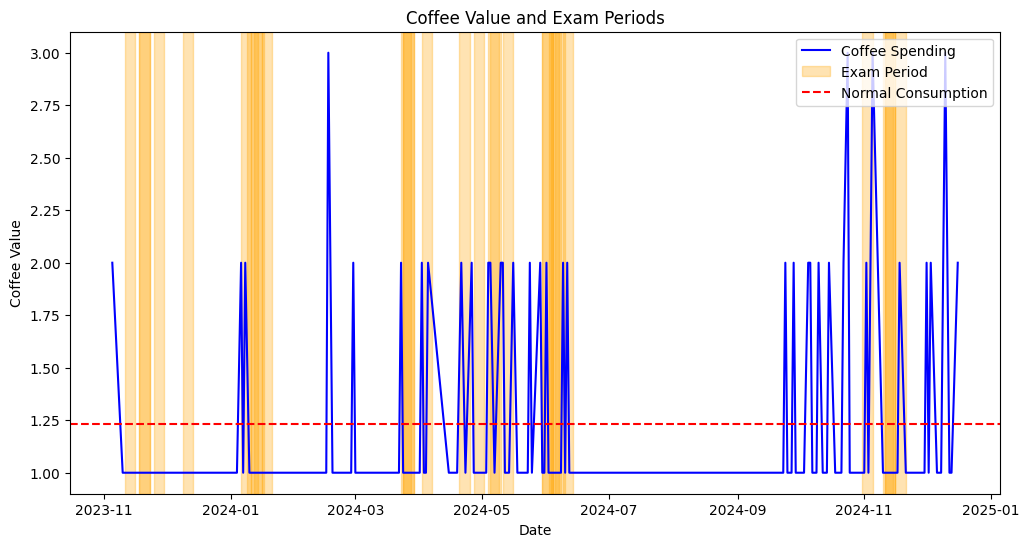

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

calendar_file_path = 'calendar_export.csv'
spending_file_path = 'spending_data1.csv'

calendar_data = pd.read_csv(calendar_file_path)

calendar_data['Start'] = pd.to_datetime(calendar_data['Start'], errors='coerce')
exam_events = calendar_data[calendar_data['Summary'].str.contains("Midterm|Final", case=False, na=False)]
exam_events['Exam_Date'] = exam_events['Start'].dt.date

spending_data = pd.read_csv(spending_file_path)
spending_data_cleaned = spending_data['spending_data'].str.split(';', expand=True)
spending_data_cleaned.columns = ['Date', 'Place', 'Amount']
spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')
spending_data_cleaned['Amount'] = pd.to_numeric(spending_data_cleaned['Amount'], errors='coerce')

coffee_spending_daily = spending_data_cleaned.groupby(spending_data_cleaned['Date'].dt.date).agg({'Amount': 'sum'}).reset_index()
coffee_spending_daily.columns = ['Date', 'Coffee_Value']
normal_consumption = coffee_spending_daily['Coffee_Value'].mean()

def is_high_consumption_near_exam(date, spending_data, exam_dates, threshold_days=5):
    for exam_date in exam_dates:
        if 0 <= (date - exam_date).days <= threshold_days:
            return spending_data['Coffee_Value'] > normal_consumption
    return False

coffee_spending_daily['Is_High_Near_Exam'] = coffee_spending_daily.apply(
    lambda row: is_high_consumption_near_exam(row['Date'], row, exam_dates=exam_events['Exam_Date'], threshold_days=5),
    axis=1
)

plt.figure(figsize=(12, 6))

plt.plot(
    coffee_spending_daily['Date'], coffee_spending_daily['Coffee_Value'], label='Coffee Value', color='blue'
)

for exam_date in exam_events['Exam_Date']:
    plt.axvspan(
        pd.to_datetime(exam_date), 
        pd.to_datetime(exam_date) + pd.Timedelta(days=5), 
        color='orange', alpha=0.3, label='Exam Period' if exam_date == exam_events['Exam_Date'].iloc[0] else None
    )
plt.axhline(y=normal_consumption, color='red', linestyle='--', label='Normal Consumption')
plt.xlabel('Date')
plt.ylabel('Coffee Value')
plt.title('Coffee Value and Exam Periods')
plt.legend()

plt.show()


/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/3946692411.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_events['Exam_Date'] = exam_events['Start'].dt.date
/var/folders/_c/jm66wb4d7gl570d8vx4_wpx00000gn/T/ipykernel_47953/3946692411.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')


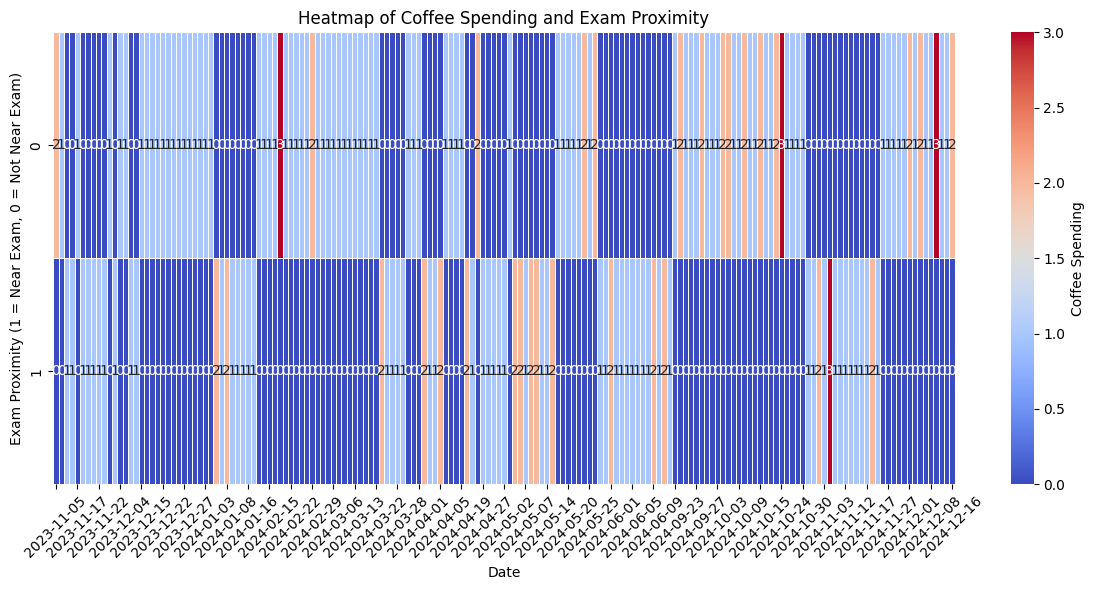

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

calendar_file_path = 'calendar_export.csv'
spending_file_path = 'spending_data1.csv'

calendar_data = pd.read_csv(calendar_file_path)

calendar_data['Start'] = pd.to_datetime(calendar_data['Start'], errors='coerce')
exam_events = calendar_data[calendar_data['Summary'].str.contains("Midterm|Final", case=False, na=False)]
exam_events['Exam_Date'] = exam_events['Start'].dt.date

spending_data = pd.read_csv(spending_file_path)
spending_data_cleaned = spending_data['spending_data'].str.split(';', expand=True)
spending_data_cleaned.columns = ['Date', 'Place', 'Amount']
spending_data_cleaned['Date'] = pd.to_datetime(spending_data_cleaned['Date'], errors='coerce')
spending_data_cleaned['Amount'] = pd.to_numeric(spending_data_cleaned['Amount'], errors='coerce')

coffee_spending_daily = spending_data_cleaned.groupby(spending_data_cleaned['Date'].dt.date).agg({'Amount': 'sum'}).reset_index()
coffee_spending_daily.columns = ['Date', 'Coffee_Spending']

normal_consumption = coffee_spending_daily['Coffee_Spending'].mean()

def is_near_exam(date, exam_dates, threshold_days=5):
    for exam_date in exam_dates:
        if 0 <= (date - exam_date).days <= threshold_days:
            return 1
    return 0

coffee_spending_daily['Is_Near_Exam'] = coffee_spending_daily['Date'].apply(
    lambda x: is_near_exam(pd.to_datetime(x).date(), exam_events['Exam_Date'], threshold_days=5)
)

heatmap_data = coffee_spending_daily.pivot_table(
    index='Date', columns='Is_Near_Exam', values='Coffee_Spending', aggfunc='sum', fill_value=0
)

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.T, 
    cmap='coolwarm', 
    cbar_kws={'label': 'Coffee Spending'}, 
    linewidths=.5, 
    annot=True, 
    fmt='.0f'
)
plt.title('Heatmap of Coffee Spending and Exam Proximity')
plt.ylabel('Exam Proximity (1 = Near Exam, 0 = Not Near Exam)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
